In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

import tensorflow as tf
import tensorflow_hub as hub

2022-03-25 00:56:34.628167: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-25 00:56:34.628208: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("/home/robin/Documents/image-classification-2/train_label.csv")

In [3]:
df.head()

,file_name,label
0,Image_000000.jpg,8
1,Image_000001.jpg,8
2,Image_000002.jpg,8
3,Image_000003.jpg,8
4,Image_000004.jpg,8


In [5]:
len(df)

31749

In [6]:
df.describe()

,label
count,31749.000000
mean,5.263693
std,2.756270
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,10.000000


In [7]:
df["label"].value_counts()

6     6285
3     4139
9     3933
7     3664
2     2778
5     2433
8     2338
0     2166
4     2052
10    1039
1      922
Name: label, dtype: int64

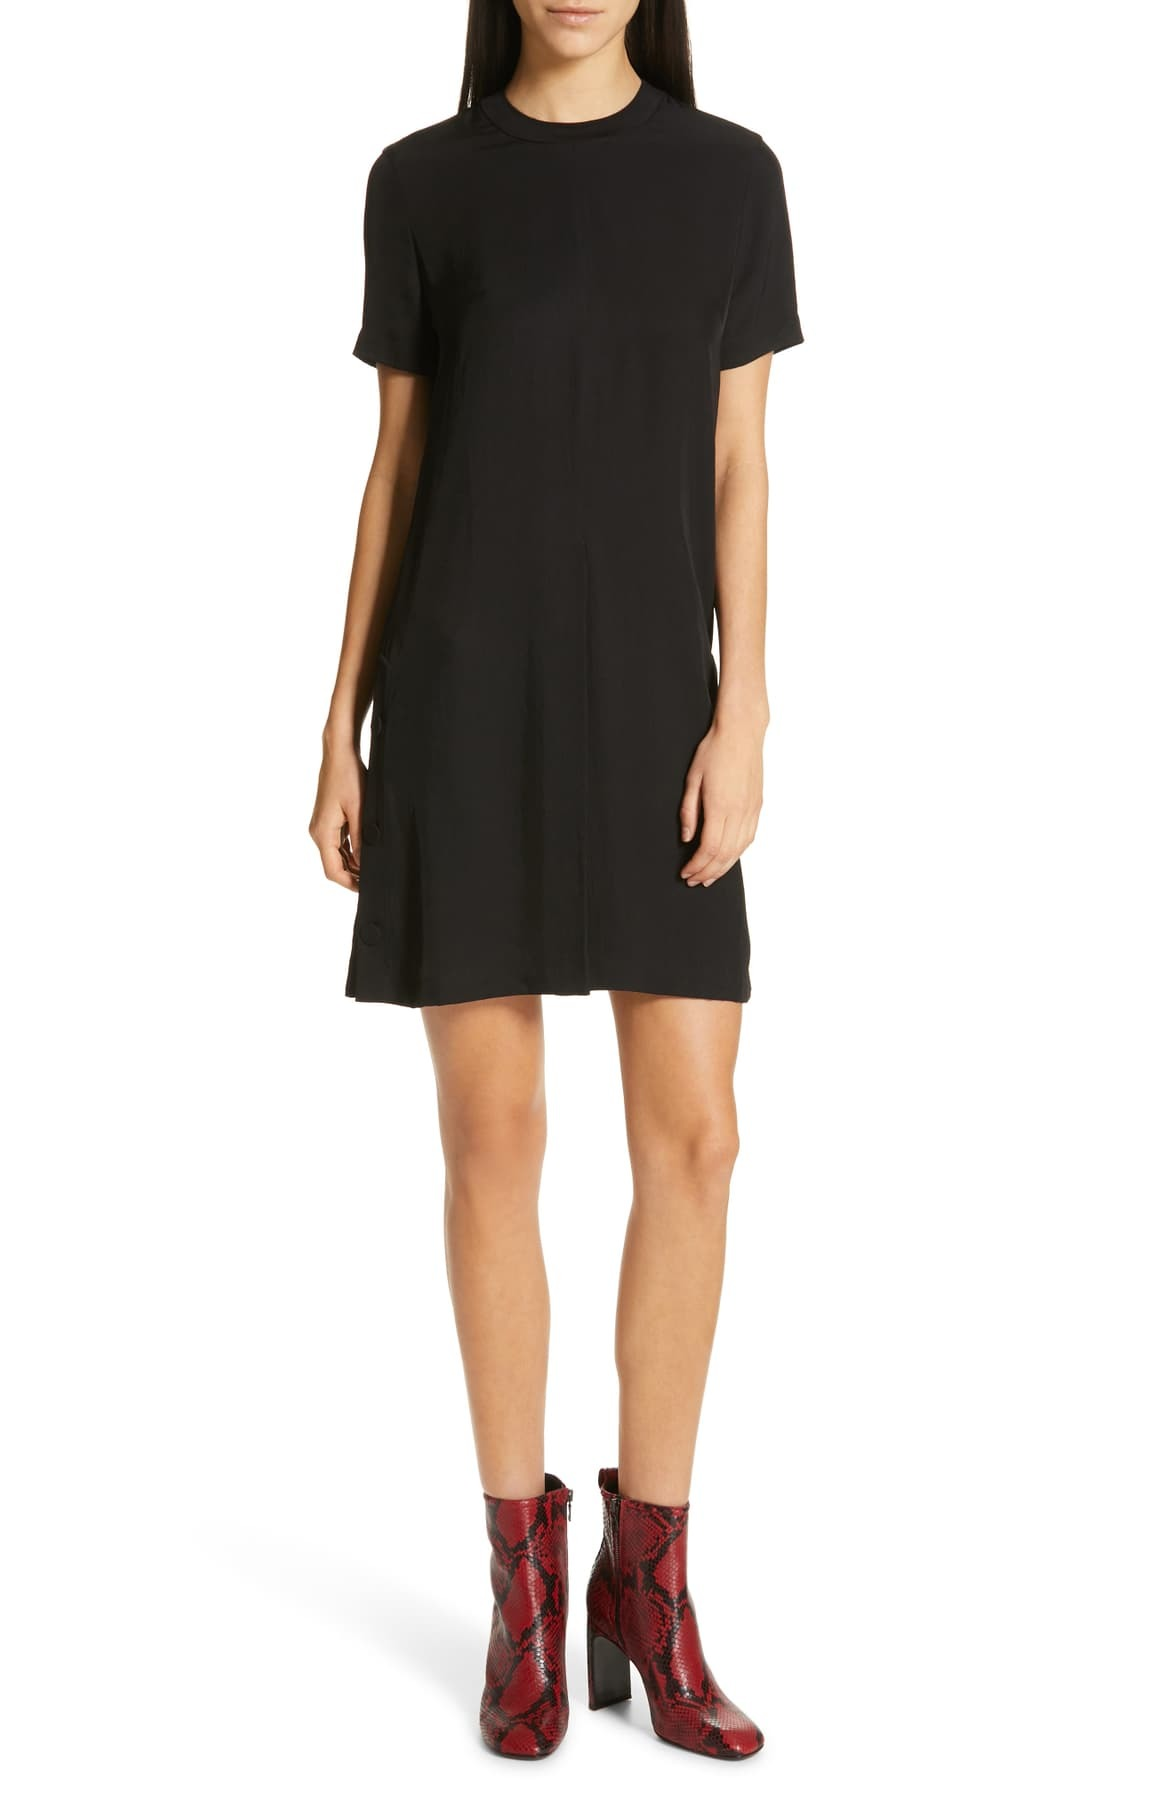

In [4]:
from IPython.display import Image
Image("/home/robin/Documents/image-classification-2/train/Image_003000.jpg")

In [4]:
filenames = ["/home/robin/Documents/image-classification-2/train/" + fname for fname in df["file_name"]]

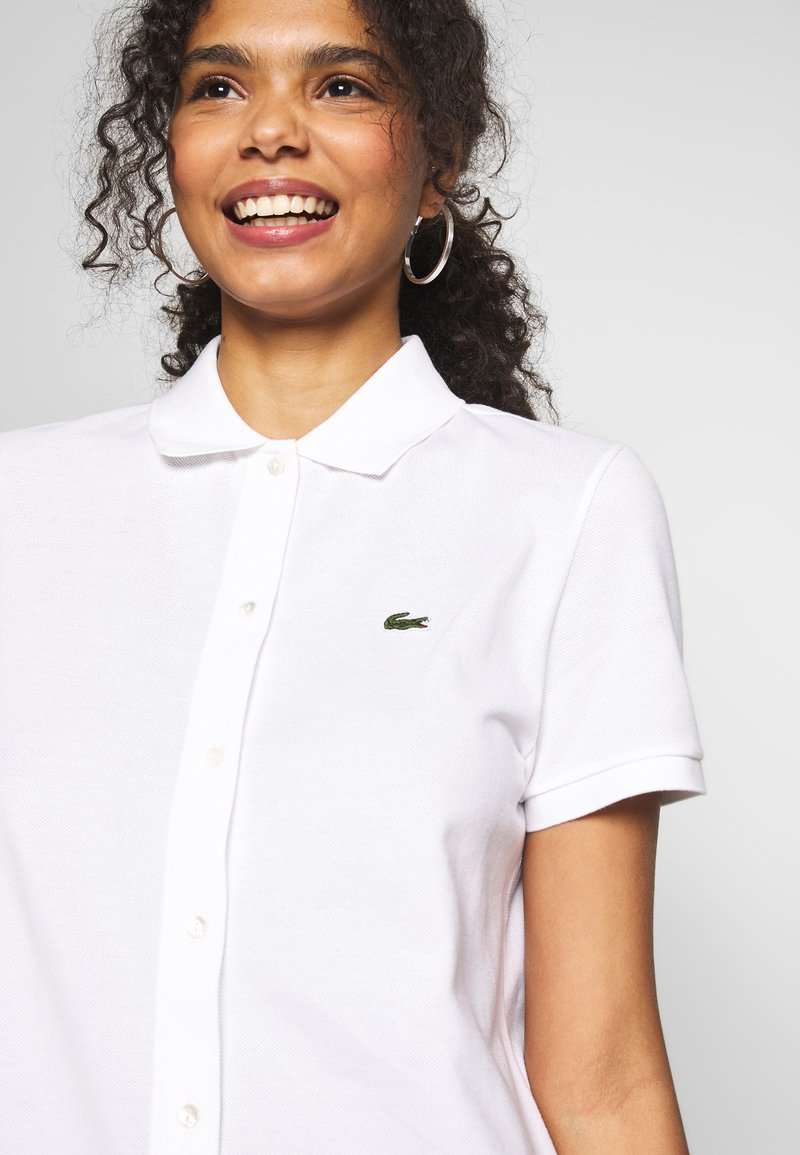

In [6]:
Image(filenames[2000])

In [5]:
# check whether the file size macth the actual images files

import os

if len(os.listdir("/home/robin/Documents/image-classification-2/train/")) == len(filenames):
    print("Matched")
    print("Total Imagefiles :",len(filenames))
    
else:
    print("Not Matched")

Matched
Total Imagefiles : 31749


In [6]:
labels = df["label"].to_numpy()
labels

array([8, 8, 8, ..., 7, 7, 7])

In [7]:
unique_label = np.unique(labels)
unique_label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
boolean_labels = [label == unique_label for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False,  True,
        False, False]),
 array([False, False, False, False, False, False, False, False,  True,
        False, False]),
 array([False, False, False, False, False, False, False, False,  True,
        False, False])]

In [8]:
print(labels[127])
print(np.where(unique_label == labels[127]))
print(boolean_labels[127].argmax())
print(boolean_labels[127].astype(int))

8
(array([8]),)
8
[0 0 0 0 0 0 0 0 1 0 0]


# Creating Validation Set

In [31]:
X = filenames
y = boolean_labels

In [18]:
# experiment with 1000 images
num_images = 5000

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X[20000:26000],
                                                 y[20000:26000],
                                                 test_size = 0.2,
                                                 random_state = 23)

# Preprocessing image(converting image into tensor)

In [13]:
## converting image into numpy array

from matplotlib.pyplot import imread

image = imread(filenames[20000])

In [46]:
image.shape

(1440, 1080, 3)

In [47]:
image[:2]

array([[[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]], dtype=uint8)

In [51]:
# turn image into tensor

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 1080, 3), dtype=uint8, numpy=
array([[[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]]], dtype=uint8)>

In [32]:
# define image size 

img_size = 299

#create a function to prprocess imgae

def preprocess_img(image_path, img_size = img_size):
    
    #read an image file
    image = tf.io.read_file(image_path)
    
    #turn the jepg image into numerical tensor with color channel of 3
    image = tf.image.decode_jpeg(image, channels = 3)
    
    #convert the image value 0-255 to 0-1
    image = tf.image.convert_image_dtype(image,tf.float32)
    
    #resize the image
    image = tf.image.resize(image, size = [img_size,img_size])
    
    return image

# Turning data into batches

In [33]:
## create a function to return a tuple(image,label)

def get_img_label(image_path, label):
    image = preprocess_img(image_path)
    
    return image,label

In [55]:
preprocess_img(X[32]),tf.constant(y[32])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.94331604, 0.9354729 , 0.9393945 ],
         [0.94117653, 0.9333334 , 0.93725497],
         [0.93340254, 0.9255594 , 0.92948097],
         ...,
         [0.93331504, 0.9293935 , 0.9137072 ],
         [0.9308056 , 0.92688406, 0.9111978 ],
         [0.9294994 , 0.9255778 , 0.90989155]],
 
        [[0.9409139 , 0.9330708 , 0.93699235],
         [0.93725497, 0.9294118 , 0.9333334 ],
         [0.9359543 , 0.92811114, 0.9320327 ],
         ...,
         [0.92569774, 0.9217762 , 0.9060899 ],
         [0.9320596 , 0.928138  , 0.91245174],
         [0.92737   , 0.92344844, 0.90776217]],
 
        [[0.94117653, 0.9333334 , 0.93725497],
         [0.94117653, 0.9333334 , 0.93725497],
         [0.9423452 , 0.93450207, 0.93842363],
         ...,
         [0.92893475, 0.9250132 , 0.9093269 ],
         [0.93048203, 0.92656046, 0.9108742 ],
         [0.9294118 , 0.92549026, 0.909804  ]],
 
        ...,
 
        [[0.92351294, 0.9274345 

In [34]:
BATCH_SIZE = 32

#create a function to turn data into batches

def create_data_batch(X,y= None,batch_size = BATCH_SIZE,test_data = False, validation_data = False):
    
    #if data is test data then there will be no label
    if test_data:
        print("Creating test data batches........")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(preprocess_img).batch(BATCH_SIZE)
        
        return data_batch
    
    elif validation_data:
        print("Creating Validation data batches.......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        
        data_batch = data.map(get_img_label).batch(BATCH_SIZE)
        
        return data_batch
    
    else:
        print("Creating Train data batches......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_img_label)
        data_batch = data.batch(BATCH_SIZE)
        
        return data_batch

In [28]:
# creating train and validation data batch

train_data = create_data_batch(X_train,y_train)
val_data = create_data_batch(X_val,y_val,validation_data = True)

Creating Train data batches......
Creating Validation data batches.......


In [29]:
# check out other attributes of data batch
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 11), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 11), dtype=tf.bool, name=None)))

# Visualize data

In [105]:
def show_25_img(images,labels):
    
    plt.figure(figsize = (12,12))
    
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_label[labels[i]])
        plt.axis("off")

In [106]:
train_images, train_labels = next(train_data.as_numpy_iterator())

len(train_images), len(train_labels)

(64, 64)

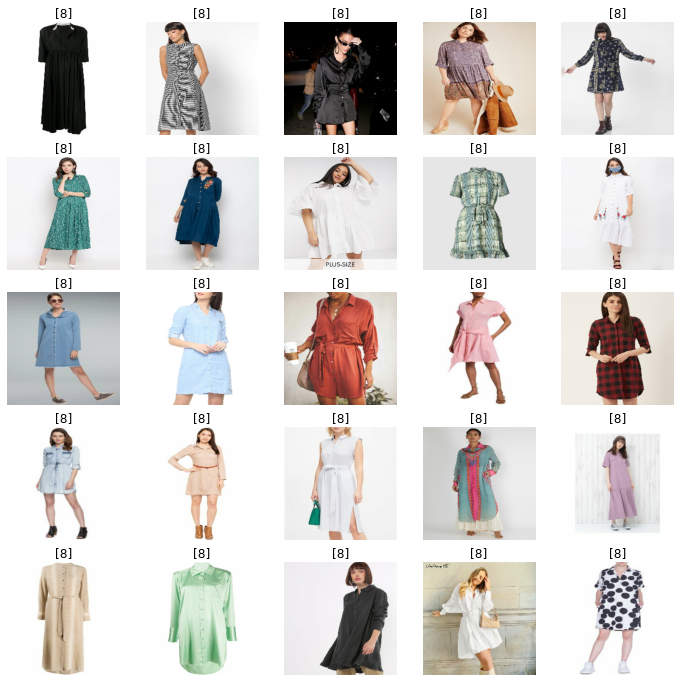

In [108]:
show_25_img(train_images,train_labels)

In [109]:
#visualize data from validation dataset

val_images, val_labels = next(val_data.as_numpy_iterator())

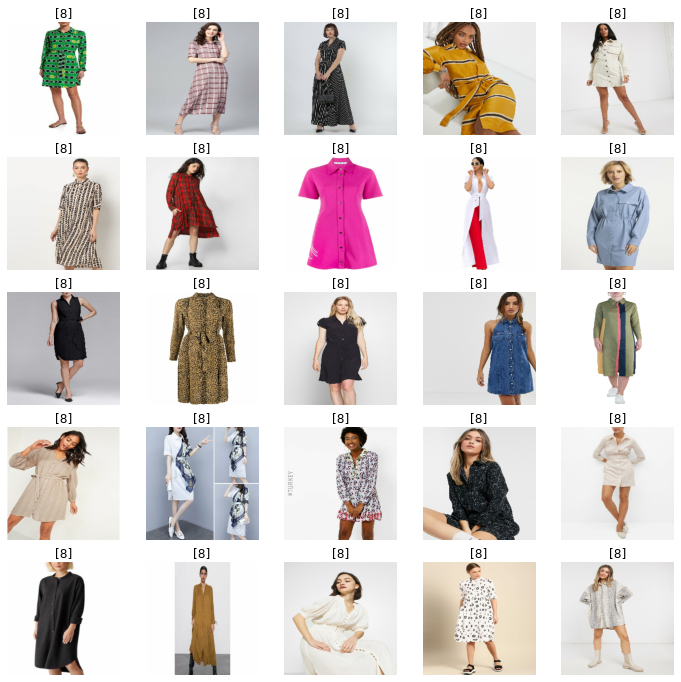

In [110]:
show_25_img(val_images,val_labels)


In [130]:
unique_label[labels[2165].argmax()]

0

In [131]:
unique_label[labels[2165]]

9

In [133]:
len(unique_label)

11

# Building Model

In [35]:
INPUT_SHAPE = [None,img_size,img_size,3]
OUTPUT_SHAPE = len(unique_label)

# #setup model url from tensorflow hub
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

#imagenet/inception-resnet
#MODEL_URL = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5"

#resnet_v2_50
#MODEL_URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"

#Inception model

MODEL_URL  = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

In [36]:
# create a function to build a model

def create_model(input_shape = INPUT_SHAPE,output_shape = OUTPUT_SHAPE,model_url = MODEL_URL):
    
    print("building model with", MODEL_URL)
    
    #setup model layers
    model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                                 tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                                                       activation = "softmax")])
    
    #compile the model
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])
    
    #build the model
    model.build(INPUT_SHAPE)
    
    return model

In [37]:
model = create_model()
model.summary()

building model with https://tfhub.dev/google/imagenet/inception_v3/classification/5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 dense_3 (Dense)             (None, 11)                11022     
                                                                 
Total params: 23,864,855
Trainable params: 11,022
Non-trainable params: 23,853,833
_________________________________________________________________


# Model Evaluating

In [38]:
#createing Callbacks

#load tensorboard notebook extention
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [39]:
#create a function to build a tensorboard callbacks

def create_tensorboard_callbacks():
    
    #create a log directory
    logdir = os.path.join("/home/robin/Documents/image-classification-2/logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    
    return tf.keras.callbacks.TensorBoard(logdir)

In [23]:
#create early stopping callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 4)

In [24]:
num_epochs = 3

In [40]:
#build a fuction to train the model

def train_model():
    
    #create a model
    model = create_model()
    
    #create tensorboard session
    tensorboard = create_tensorboard_callbacks()
    
    #fit the model
    model.fit(x = train_data,
              epochs = num_epochs,
              validation_data = val_data,
              validation_freq = 1,
              callbacks = [tensorboard,early_stopping])
    
    return model
    

In [30]:
#fit the model

model = train_model()

building model with https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Epoch 1/3


2022-03-25 01:53:18.679590: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2022-03-25 01:53:19.895947: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2022-03-25 01:53:20.735376: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2022-03-25 01:53:20.981907: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2022-03-25 01:53:21.523140: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.


110/110 [==============================] - 2341s 21s/step - loss: 1.0822 - accuracy: 0.5517 - val_loss: 0.7949 - val_accuracy: 0.6687
Epoch 2/3
  4/110 [>.............................] - ETA: 25:02 - loss: 0.6596 - accuracy: 0.7812

KeyboardInterrupt: 

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X[16000:21000],
                                               y[16000:21000],
                                               test_size = 0.3,
                                               random_state = 29)

In [26]:
model_1 = train_model()

building model with https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Epoch 1/3
110/110 [==============================] - 936s 9s/step - loss: 1.1074 - accuracy: 0.5586 - val_loss: 0.8687 - val_accuracy: 0.6487
Epoch 2/3
110/110 [==============================] - 1261s 11s/step - loss: 0.8387 - accuracy: 0.6420 - val_loss: 0.8369 - val_accuracy: 0.6467
Epoch 3/3
110/110 [==============================] - 836s 8s/step - loss: 0.7807 - accuracy: 0.6646 - val_loss: 0.8131 - val_accuracy: 0.6753


In [150]:
# make prediction on validation dataset

val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.bool, name=None))>

In [151]:
predictions = model.predict(val_data,verbose = 1)
predictions

5/5 [==============================] - 12s 2s/step


array([[4.13098569e-08, 1.07609615e-07, 2.05210824e-07, ...,
        9.99998212e-01, 1.47740863e-07, 3.28176867e-07],
       [2.30179396e-08, 9.04547761e-08, 4.57633064e-07, ...,
        9.99998450e-01, 6.38834479e-08, 1.89529015e-08],
       [2.89825357e-06, 7.01033377e-06, 5.37552660e-06, ...,
        9.99761283e-01, 1.22225026e-06, 5.92183869e-06],
       ...,
       [6.86752683e-05, 4.32965135e-05, 4.16680588e-04, ...,
        9.96281087e-01, 2.25866868e-04, 1.50971518e-05],
       [7.10519856e-08, 1.65731888e-06, 2.79949450e-06, ...,
        9.99990463e-01, 3.11005380e-07, 1.14673401e-06],
       [1.34956730e-08, 5.94580882e-08, 2.36947827e-07, ...,
        9.99998689e-01, 5.78236410e-08, 3.19177957e-07]], dtype=float32)

In [152]:
predictions.shape

(300, 11)

In [157]:
index = 247
print(predictions[index])
print(f"max prediction probability :{np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_label[np.argmax(predictions[index])]}")

[7.3677293e-06 8.8290835e-06 8.1556100e-05 3.3426724e-05 2.1883348e-05
 1.7721068e-05 1.6207328e-05 3.4835051e-05 9.9974006e-01 2.8288398e-06
 3.5246281e-05]
max prediction probability :0.9997400641441345
sum: 0.9999999403953552
Max index: 8
Predicted label: 8


In [41]:
# Turn prediction probability into respective labels

def get_pred_label(prediction_probabilities):
    
    return unique_label[np.argmax(prediction_probabilities)]

In [42]:
#create a function to unbatch a batch dataset

def unbatchify(data):
    
    """
    takes a batched dataset of (image,label) Tensors and return seperate arrays
    of images and labels
    """
    images = []
    labels = []
    
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_label[np.argmax(label)])
        
    return images,labels

In [160]:
#unbatchify the validation data
val_images, val_labels = unbatchify(val_data)

In [162]:
val_images[50], val_labels[50]"""
  takes a batched dataset of (image,label) Tensors and return seperate arrays
  of images and labels
  """

(array([[[0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         ...,
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785]],
 
        [[0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         ...,
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785]],
 
        [[0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         ...,
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785]],
 
        ...,
 
        [[0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         [0.9960785, 0.9960785, 0.9960785],
         .

In [165]:
get_pred_label(val_labels[98])

0

In [166]:
get_pred_label(predictions[98])

8

# Create a function to save and load model

In [43]:
def save_model(model,suffix = None):
    
    #create a model_dir
    model_dir = os.path.join("/home/robin/Documents/image-classification-2/models")
    
    model_path = model_dir + "-" + suffix + ".h5"
    print(f"saving model to :{model_path}........")
    
    model.save(model_path)
    
    return model_path

In [44]:
def load_model(model_path):
    
    print(f"Loading the Saved model: {model_path}")
    
    model = tf.keras.models.load_model(model_path,
                                       custom_objects = {"KerasLayer":hub.KerasLayer})
    
    return model

# Train the model with Full Dataset

In [45]:
# create  data batch for full dataset

full_data = create_data_batch(X,y)

Creating Train data batches......


In [46]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.bool, name=None))>

In [47]:
#create a model for full data

full_model = create_model()

building model with https://tfhub.dev/google/imagenet/inception_v3/classification/5


In [48]:
#create full model callbacks

full_model_tensorboard = create_tensorboard_callbacks()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience = 3,
                                                             restore_best_weights=True)

In [49]:
# fit the full model

full_model.fit(x = full_data,
               epochs = 30,
               callbacks = [full_model_tensorboard,full_model_early_stopping])

Epoch 1/30
993/993 [==============================] - 5623s 6s/step - loss: 1.4782 - accuracy: 0.4941
Epoch 2/30
993/993 [==============================] - 5556s 6s/step - loss: 1.3256 - accuracy: 0.5434
Epoch 3/30
993/993 [==============================] - 5572s 6s/step - loss: 1.2842 - accuracy: 0.5594
Epoch 4/30
993/993 [==============================] - 5526s 6s/step - loss: 1.2601 - accuracy: 0.5669
Epoch 5/30
993/993 [==============================] - 5529s 6s/step - loss: 1.2452 - accuracy: 0.5691
Epoch 6/30
993/993 [==============================] - 5590s 6s/step - loss: 1.2343 - accuracy: 0.5734
Epoch 7/30
220/993 [=====>........................] - ETA: 1:14:14 - loss: 1.1967 - accuracy: 0.5817

KeyboardInterrupt: 

In [50]:
#save model trained on full dataset
save_model(model,suffix = "fasion_apparel_clf_imagenet_inception_mdl")

saving model to :/home/robin/Documents/image-classification-2/models-fasion_apparel_clf_imagenet_inception_mdl.h5........


'/home/robin/Documents/image-classification-2/models-fasion_apparel_clf_imagenet_inception_mdl.h5'

In [52]:
loaded_model = load_model("/home/robin/Documents/image-classification-2/models-fasion_apparel_clf_imagenet_inception_mdl.h5")

Loading the Saved model: /home/robin/Documents/image-classification-2/models-fasion_apparel_clf_imagenet_inception_mdl.h5


In [53]:
#load the test data
import os

test_path = "/home/robin/Documents/image-classification-2/test/"
test_filename = [test_path + fname for fname in os.listdir(test_path)]

test_filename[:10]

['/home/robin/Documents/image-classification-2/test/Image_test_005998.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_016645.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_003249.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_002488.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_014254.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_003619.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_003114.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_008215.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_007497.jpg',
 '/home/robin/Documents/image-classification-2/test/Image_test_016292.jpg']

In [55]:
len(test_filename)

18223

In [56]:
#Create test data batch

test_data = create_data_batch(test_filename, test_data = True)


Creating test data batches........


In [57]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None)>

In [59]:
# Make prediction on test data batch with fully loaded model

test_predictions = loaded_model.predict(test_data,verbose = 1)

570/570 [==============================] - 3421s 6s/step


In [62]:
test_predictions.shape

(18223, 11)

In [65]:
print(f"prdicted label: {unique_label[np.argmax(test_predictions[5])]}")

prdicted label: 2


In [68]:
# save prediction(numpy array) to csv file for access later
np.savetxt("/home/robin/Documents/preds_array.csv", test_predictions,delimiter = ",")

In [69]:
test_predictions = np.loadtxt("/home/robin/Documents/preds_array.csv",delimiter = ",")

In [70]:
test_predictions

array([[4.34836447e-01, 5.36744110e-02, 7.18411654e-02, ...,
        3.33999842e-02, 3.23075652e-02, 4.48009418e-03],
       [8.77954904e-03, 1.06825903e-02, 7.65874326e-01, ...,
        5.22554899e-03, 1.61829800e-03, 1.49679522e-03],
       [6.84191644e-01, 7.85801411e-02, 2.35692617e-02, ...,
        2.03560051e-02, 1.26192775e-02, 7.56469846e-04],
       ...,
       [4.83600572e-02, 7.61851436e-03, 5.70643127e-01, ...,
        8.98839906e-03, 4.29358408e-02, 8.66377028e-04],
       [2.12445915e-01, 3.09292465e-01, 2.40026921e-01, ...,
        7.33151240e-03, 6.15626108e-03, 2.43306137e-03],
       [2.94953603e-02, 5.66792395e-03, 6.61739707e-01, ...,
        5.01492806e-02, 1.24306912e-02, 1.65340281e-03]])

In [72]:
sam = pd.read_csv("/home/robin/Documents/image-classification-2/sample_submission.csv")
sam.head()

,file_name,label
0,Image_test_000000.jpg,0
1,Image_test_000001.jpg,0
2,Image_test_000002.jpg,0
3,Image_test_000003.jpg,0
4,Image_test_000004.jpg,0


In [73]:
sam_df = pd.DataFrame(columns = ["filename","label"])

In [74]:
sam_df

,filename,label


In [75]:
os.path.splitext(test_filename[0])[0]

'/home/robin/Documents/image-classification-2/test/Image_test_005998'

In [76]:
# appending test image id to predictions Dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[10]

'Image_test_002606'

In [113]:
new_sam_df = pd.DataFrame(columns=["file_name","label"])

In [115]:
new_sam_df.head()

,file_name,label


In [116]:
test_file = [fname for fname in os.listdir(test_path)]
test_file[:2]

['Image_test_005998.jpg', 'Image_test_016645.jpg']

In [117]:
new_sam_df["file_name"] = test_file

In [118]:
new_sam_df.head()

,file_name,label
0,Image_test_005998.jpg,NaN
1,Image_test_016645.jpg,NaN
2,Image_test_003249.jpg,NaN
3,Image_test_002488.jpg,NaN
4,Image_test_014254.jpg,NaN


In [119]:
sam_pred_lab = [get_pred_label(test_predictions[i]) for i in range(len(test_ids))]

In [120]:
new_sam_df["label"] = sam_pred_lab

In [121]:
new_sam_df.head(4)

,file_name,label
0,Image_test_005998.jpg,0
1,Image_test_016645.jpg,2
2,Image_test_003249.jpg,0
3,Image_test_002488.jpg,2


In [126]:
new_sam_df.to_csv("new_sample_sub.csv",index = False)

In [123]:
sam_sub = pd.read_csv("/home/robin/Documents/image-classification-2/sample_submission.csv")

In [124]:
sam_sub.head(3)

,file_name,label
0,Image_test_000000.jpg,0
1,Image_test_000001.jpg,0
2,Image_test_000002.jpg,0


In [125]:
!pip install kaggle

     |████████████████████████████████| 58 kB 271 kB/s eta 0:00:01     |██████████████████████▎         | 40 kB 464 kB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=c3c49ec59c665aa152e94e8596b24793da7909fede54108352c3abd62f3965c4
  Stored in directory: /home/robin/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [138]:
#n_df = pd.read_csv("/home/robin/Documents/new_submission.csv")

In [128]:
n_df.head()

,Unnamed: 0,file_name,label
0,0,Image_test_005998,3
1,1,Image_test_016645,6
2,2,Image_test_003249,8
3,3,Image_test_002488,2
4,4,Image_test_014254,3


In [130]:
new_d = n_df.copy()

In [131]:
new_d.head()

,Unnamed: 0,file_name,label
0,0,Image_test_005998,3
1,1,Image_test_016645,6
2,2,Image_test_003249,8
3,3,Image_test_002488,2
4,4,Image_test_014254,3


In [133]:
df_2 = pd.DataFrame(columns = ["file_name","label"])

In [134]:
df_2["file_name"] = new_d["file_name"]
df_2["label"] = new_d["label"]

In [139]:
len(df_2)

18223

In [136]:
df_2.to_csv("new_csv",index= False)